#### Import all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#### Import data and Basic Exploratory Data Analysis

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [8]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


#### Spliting Features and Target variables

In [4]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [5]:
print("Shape:", X.shape)
X.head()

Shape: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
print("Shape:", y.shape)

Shape: (20640,)


#### Train & Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (16512, 8)
Test size: (4128, 8)


#### Build Regression Pipeline

In [9]:
pipeline = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])

#### Model Training and Prediction

In [10]:
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [11]:
y_pred = pipeline.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

#### Evaluating the model

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print("MSE:", mse)
print("R²:", r2)

MSE: 0.5558915986952441
R²: 0.575787706032451


#### Cross Validation

In [14]:
cv_scores = cross_val_score( pipeline, X_train, y_train, cv=5, scoring="r2")

In [15]:
print("CV R² mean:", cv_scores.mean())
print("CV std:", cv_scores.std())

CV R² mean: 0.6114839952560993
CV std: 0.006466940989012821


### Apply other Regression model

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

##### Model Pipelines for other Regression models

In [17]:
regression_models = {

    "linear": Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())]),

    "ridge": Pipeline([("scaler", StandardScaler()),  ("model", Ridge(alpha=1.0))]),

    "lasso": Pipeline([("scaler", StandardScaler()),  ("model", Lasso(alpha=0.01))]),

    "rf": Pipeline([("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))]),

    "xgb": Pipeline([("model", XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, subsample=0.8, random_state=42))])
}

##### Cross Validation for other Regression models

In [18]:
results = []

for name, model in regression_models.items():

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)

    results.append({"model": name, "cv_r2_mean": cv_scores.mean(), "cv_r2_std": cv_scores.std()})

results_df = pd.DataFrame(results).sort_values(by="cv_r2_mean", ascending=False)

results_df

,model,cv_r2_mean,cv_r2_std
4,xgb,0.839409,0.004600
3,rf,0.804875,0.005296
0,linear,0.611484,0.006467
1,ridge,0.611484,0.006460
2,lasso,0.607711,0.004625


In [19]:
test_results = []

for name, model in regression_models.items():

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    test_results.append({"model": name, "test_mse": mse, "test_r2": r2})

test_results_df = pd.DataFrame(test_results).sort_values(by="test_r2", ascending=False)

test_results_df

,model,test_mse,test_r2
4,xgb,0.212525,0.837818
3,rf,0.253956,0.806201
2,lasso,0.548255,0.581615
1,ridge,0.555855,0.575816
0,linear,0.555892,0.575788


##### Selection of the Best Model

In [20]:
best_model_name = test_results_df.iloc[0]["model"]
best_model = regression_models[best_model_name]

print("Best model:", best_model_name)

Best model: xgb


##### Train the best algorithm on full training data

In [21]:
best_model.fit(X_train, y_train)

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


##### Feature Importance


Top Features:
      feature  importance
0      MedInc    0.490627
5    AveOccup    0.152743
7   Longitude    0.099473
6    Latitude    0.090398
1    HouseAge    0.069780
2    AveRooms    0.042408
3   AveBedrms    0.028979
4  Population    0.025591


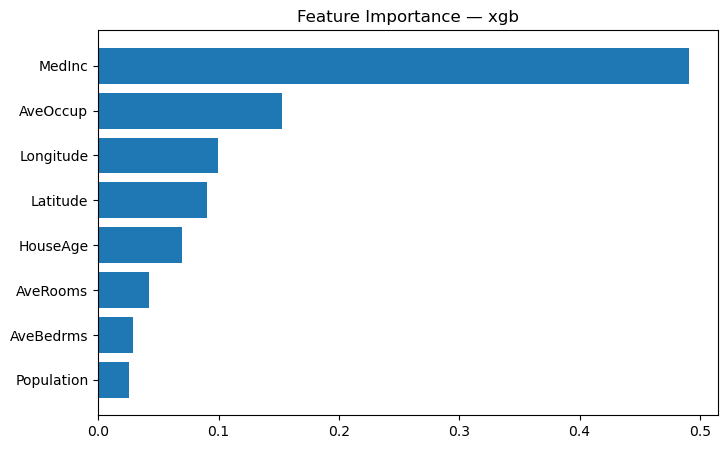

In [22]:
if best_model_name in ["rf", "xgb"]:

    importances = best_model.named_steps["model"].feature_importances_

    fi_df = pd.DataFrame({ "feature": X.columns, "importance": importances}).sort_values(by="importance", ascending=False)

    print("\nTop Features:")
    print(fi_df.head(10))

    plt.figure(figsize=(8,5))
    plt.barh(fi_df["feature"], fi_df["importance"])
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance — {best_model_name}")
    plt.show()

#### Saving the Best Model

In [23]:
import joblib
REG_MODEL_PATH = "california_housing_best.pkl"

joblib.dump(best_model, REG_MODEL_PATH)
print("Saved:", REG_MODEL_PATH)

Saved: california_housing_best.pkl
